In [122]:
library(dplyr)
library(ggplot2)
library(ggmap)
options(repr.plot.width=7, repr.plot.height=4.5)

Data downlaoded from this link: https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

In [1]:
data <- read.csv("data/Crimes_-_2001_to_present.csv")

In [4]:
# number or rows (crimes):
nrow(data)

[1] 6532181

In [2]:
summary(data)

       ID             Case.Number                          Date        
 Min.   :     634   HJ590004:      6   01/01/2008 12:01:00 AM:    289  
 1st Qu.: 3359475   HZ140230:      6   01/01/2007 12:01:00 AM:    244  
 Median : 6025044   HP296582:      5   01/01/2006 12:01:00 AM:    224  
 Mean   : 6056623   HS256531:      5   01/01/2003 12:01:00 AM:    212  
 3rd Qu.: 8594144           :      4   01/01/2004 12:00:00 AM:    212  
 Max.   :11224033   HJ104730:      4   01/01/2005 12:01:00 AM:    205  
                    (Other) :6532151   (Other)               :6530795  
                  Block              IUCR                  Primary.Type    
 100XX W OHARE ST    :  14988   0820   : 527056   THEFT          :1366222  
 001XX N STATE ST    :  11532   0486   : 497878   BATTERY        :1191962  
 076XX S CICERO AVE  :   9061   0460   : 489702   CRIMINAL DAMAGE: 748992  
 008XX N MICHIGAN AVE:   7955   1320   : 352019   NARCOTICS      : 700354  
 0000X N STATE ST    :   7539   1310   : 344

This dataset is really big (1.54 GB), and take a while to load and perform operations on, so I'm going to randomly sample 10% of the rows for initial exporation to speed things up.

In [7]:
data <- data %>% sample_frac(.1)

In [9]:
summary(data)

       ID             Case.Number                         Date       
 Min.   :     643   HM378023:     2   01/01/2008 12:01:00 AM:    32  
 1st Qu.: 3360720   HS256531:     2   01/01/2002 12:01:00 AM:    30  
 Median : 6024963   186982  :     1   01/01/2003 12:01:00 AM:    28  
 Mean   : 6058040   392839  :     1   01/01/2007 12:01:00 AM:    28  
 3rd Qu.: 8592500   468407  :     1   01/01/2007 12:00:00 AM:    21  
 Max.   :11223698   C016585 :     1   01/01/2012 12:01:00 AM:    20  
                    (Other) :653210   (Other)               :653059  
                  Block             IUCR                 Primary.Type   
 100XX W OHARE ST    :  1501   0820   : 52853   THEFT          :136574  
 001XX N STATE ST    :  1084   0486   : 50004   BATTERY        :119274  
 076XX S CICERO AVE  :   904   0460   : 48870   CRIMINAL DAMAGE: 74665  
 008XX N MICHIGAN AVE:   783   1320   : 35209   NARCOTICS      : 69888  
 0000X N STATE ST    :   755   1310   : 34295   OTHER OFFENSE  : 40427  
 0

Those new summary stats with the randomly sampled subset are pretty much the same, which validates this as an approach for exploration and visualisation with a more manageable dataset size. Just note that the dates are in a random order in the dataframe now, due to the sampling process.

Let's check out some example data to see what the columns are, and note down some quick assumptions about each variable.

In [18]:
head(data, 5)

ID       Case.Number Date                   Block               IUCR
5684735  3993859 HL354968    05/13/2005 07:30:00 PM 024XX N HARDING AVE 0820
3040137  9404529 HW548133    11/25/2013 09:00:00 PM 007XX W 17TH ST     1365
6094061 10578178 HZ325512    06/23/2016 04:00:00 PM 065XX W ROSCOE ST   0620
4267045  2128565 HH370246    05/14/2002 02:23:37 AM 006XX W HARRISON ST 0460
2743326  8925080 HV597414    12/02/2012 09:00:00 PM 096XX S BRENNAN AVE 2820
        Primary.Type      Description      Location.Description   Arrest
5684735 THEFT             $500 AND UNDER   VEHICLE NON-COMMERCIAL false 
3040137 CRIMINAL TRESPASS TO RESIDENCE     APARTMENT              true  
6094061 BURGLARY          UNLAWFUL ENTRY   APARTMENT              false 
4267045 BATTERY           SIMPLE           OTHER                  false 
2743326 OTHER OFFENSE     TELEPHONE THREAT RESIDENCE              false 
        Domestic ⋯ Ward Community.Area FBI.Code X.Coordinate Y.Coordinate Year
5684735 false    ⋯ 30   22             06       1149643      1915831      2005
3040137 false    ⋯ 25   31             26       1171646      1892020      2013
6094061 false    ⋯ 36   17             05       1131961      1921891      2016
4267045 false    ⋯  2   28             08B      1172257      1897564      2002
2743326 true     ⋯  7   51             26       1193219      1841643      2012
        Updated.On             Latitude Longitude Location                     
5684735 04/15/2016 08:55:02 AM 41.92496 -87.72557 (41.924958858, -87.725566718)
3040137 02/04/2016 06:33:39 AM 41.85916 -87.64542 (41.859163596, -87.645419453)
6094061 07/02/2016 03:49:53 PM 41.94191 -87.79040 (41.94191373, -87.790398439) 
4267045 04/15/2016 08:55:02 AM 41.87436 -87.64301 (41.874363279, -87.643013039)
2743326 02/04/2016 06:33:39 AM 41.72042 -87.56788 (41.720424313, -87.567879745)

Noting some of my observations and assumptions about each data column:

| Variable| Type |Description/questions?|
|:---|:---|:---|
|   ID  | integer| unique idenifier for crime|
| Date | date and time stamp | actual time of crime or report of crime? |
|Block | string   | approximate location of crime|
|IUCR|integer | unclear |
|Primary.Type | category | classification of crime |
|Description | category | additional classifcation of crime? |
|Location.Description | category | type of location where crime occured |
|Arrest | Boolean | If crime resulted in arrest (is this at police call or subsequently?) |
|Domestic | Boolean | If crime was a domestic/family indicent? |
|Beat| integer | ID of police patrol route |
|District| integer | ID of goverment district area\* |
|Ward| integer | ID of goverment subdistrict area?\*|
|Community.Area| integer | ID of community area?\*|
|FBI.Code| category | FBI ID for area?\*|
|X.Coordinate | integer | Easting coorindinate (what coordinate system?) |
|Y.Coordinate | integer | Northing coorindate |	
|Year | integer | Year crime took place |
|Updated.On	| date and time stamp | Unclear - maybe when it was added to dataset? |
|Latitude | float | Long coorindate (assume WGS84 system)|	
|Longitude | float | Lat coorindate (assume WGS84 system) |
|Location | list | Joinined log and lat coordinates |


\*How do these districts differ? Maybe we can just choose one for analysis for simplicity.

Let's plot the crimes by year to get a general indication of trends...

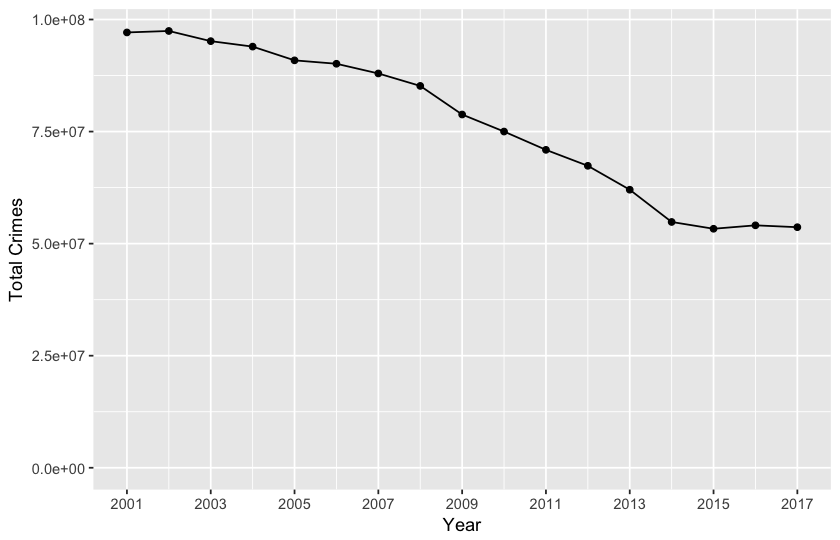

In [78]:
data_by_year <- data %>% 
    group_by(Year) %>%
    summarise(total = sum(Year))

ggplot(data=data_by_year[!data_by_year$Year == 2018,], aes(x=Year, y=total)) +  #ignoring 2018 since it's incomplete
    geom_line() +
    geom_point() +
    scale_y_continuous("Total Crimes", limits = c(0, max(data_by_year$total))) +
    scale_x_continuous(breaks = round(seq(min(data_by_year$Year), max(data_by_year$Year), by = 2)))

So there's quite a pronounced downward trend here. (Note that this is jut 10% of the data so we should multiply these numbers by 10 for the actual value.) Let's look at trends by crime type...

In [48]:
data_by_type <- data %>% 
    group_by(Primary.Type) %>%
    tally

In [50]:
data_by_type

Primary.Type                      n     
1  ARSON                               1097
2  ASSAULT                            40328
3  BATTERY                           119274
4  BURGLARY                           37668
5  CONCEALED CARRY LICENSE VIOLATION     14
6  CRIM SEXUAL ASSAULT                 2584
7  CRIMINAL DAMAGE                    74665
8  CRIMINAL TRESPASS                  18999
9  DECEPTIVE PRACTICE                 24705
10 DOMESTIC VIOLENCE                      1
11 GAMBLING                            1382
12 HOMICIDE                             893
13 HUMAN TRAFFICKING                      3
14 INTERFERENCE WITH PUBLIC OFFICER    1407
15 INTIMIDATION                         368
16 KIDNAPPING                           660
17 LIQUOR LAW VIOLATION                1391
18 MOTOR VEHICLE THEFT                30724
19 NARCOTICS                          69888
20 NON - CRIMINAL                         7
21 NON-CRIMINAL                          15
22 OBSCENITY                             50
23 OFFENSE INVOLVING CHILDREN          4368
24 OTHER NARCOTIC VIOLATION              12
25 OTHER OFFENSE                      40427
26 PROSTITUTION                        6786
27 PUBLIC INDECENCY                      16
28 PUBLIC PEACE VIOLATION              4669
29 RITUALISM                              2
30 ROBBERY                            24724
31 SEX OFFENSE                         2427
32 STALKING                             333
33 THEFT                             136574
34 WEAPONS VIOLATION                   6757

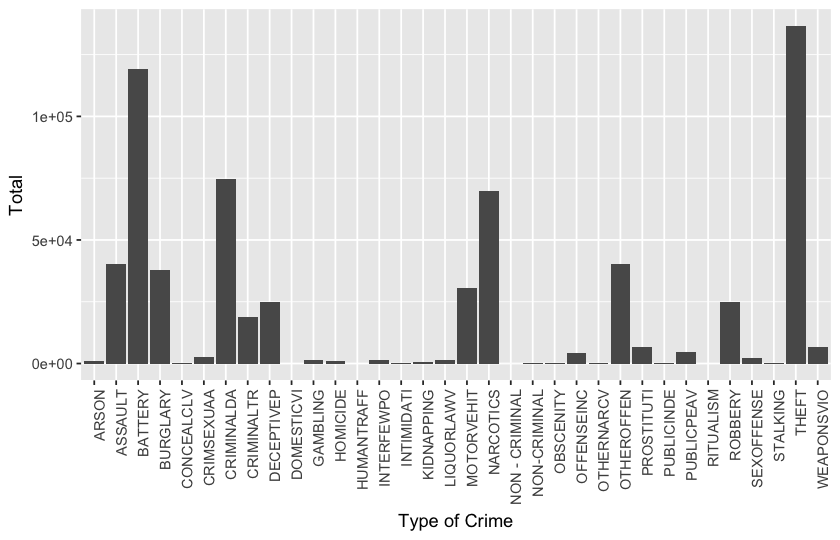

In [79]:
ggplot(data = data, aes(Primary.Type)) +
    geom_bar() +
    scale_x_discrete("Type of Crime", label=function(x) abbreviate(x, minlength=10)) +
    scale_y_continuous("Total") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

So there's a few types of crime dominating the stats. Let's plot these big ones over time..

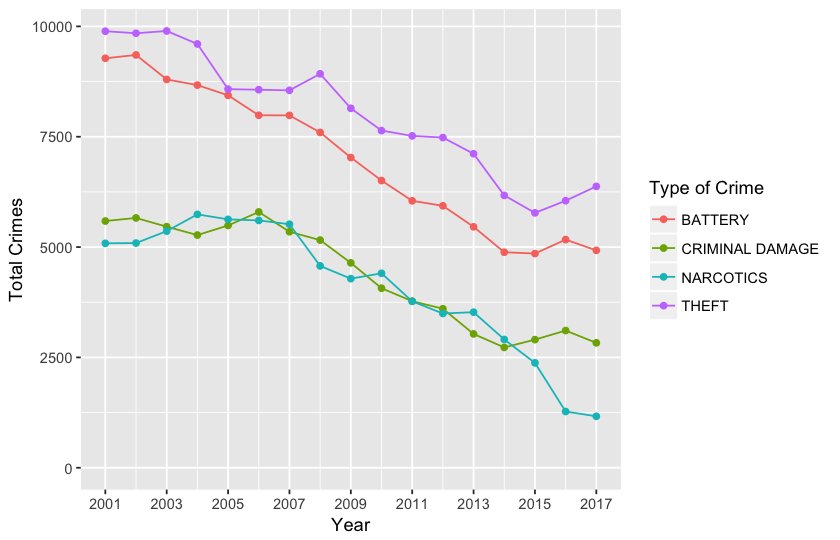

In [94]:
data_by_type_year <- data %>% 
    filter(Primary.Type == "BATTERY" |
           Primary.Type == "CRIMINAL DAMAGE" |
           Primary.Type == "NARCOTICS" |
           Primary.Type == "THEFT") %>%
    filter(Year != 2018) %>%
    group_by(Year, Primary.Type) %>%
    tally

ggplot(data = data_by_type_year, aes(x=Year, y=n, group=Primary.Type, colour=Primary.Type)) + 
    geom_line() + 
    geom_point() +
    scale_y_continuous("Total Crimes", limits = c(0, max(data_by_type_year$n))) +
    scale_x_continuous(breaks = round(seq(min(data_by_year$Year), max(data_by_year$Year), by = 2))) +
    labs(colour = "Type of Crime")

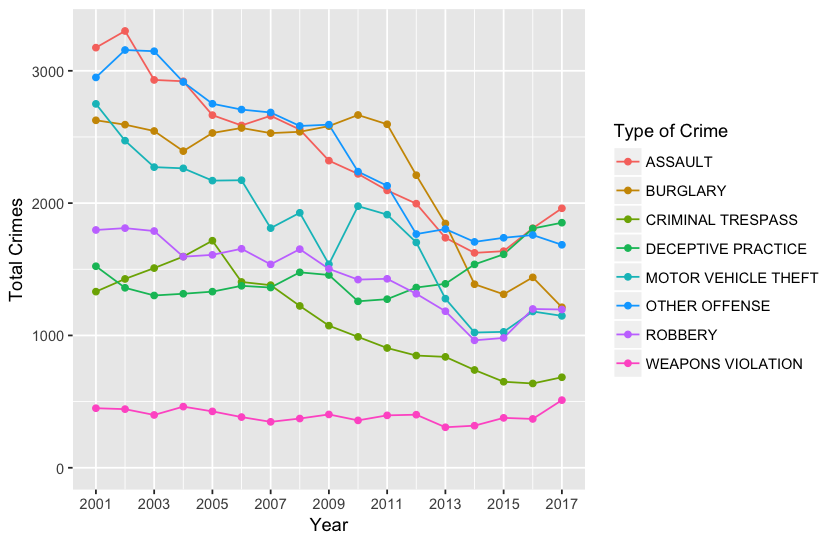

In [96]:
data_by_type_year_2 <- data %>% 
    filter(Primary.Type == "ASSAULT" | 
           Primary.Type == "BURGLARY" | 
           Primary.Type == "CRIMINAL TRESPASS" | 
           Primary.Type == "DECEPTIVE PRACTICE" | 
           Primary.Type == "MOTOR VEHICLE THEFT" | 
           Primary.Type == "OTHER OFFENSE" |
           Primary.Type == "ROBBERY" |
           Primary.Type == "WEAPONS VIOLATION") %>%
    filter(Year != 2018) %>%
    group_by(Year, Primary.Type) %>%
    tally

ggplot(data = data_by_type_year_2, aes(x=Year, y=n, group=Primary.Type, colour=Primary.Type)) + 
    geom_line() + 
    geom_point() +
    scale_y_continuous("Total Crimes", limits = c(0, max(data_by_type_year_2$n))) +
    scale_x_continuous(breaks = round(seq(min(data_by_year$Year), max(data_by_year$Year), by = 2))) +
    labs(colour = "Type of Crime")

So everything seems to be trending downwards apart from thefy, deceptive practice and assault, which have increased a bit in the last few years. <p>
Let's have a look as seasonal trends...

In [102]:
data$Month <- strtrim(data$Date, 2)

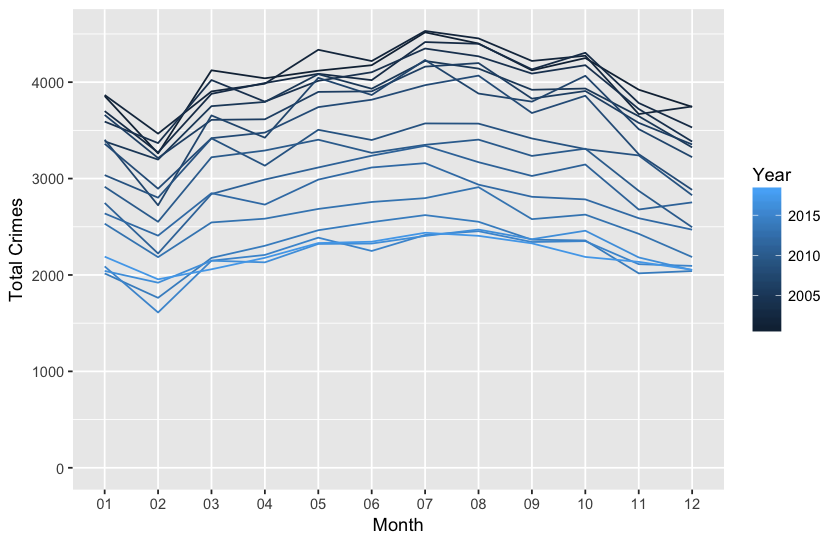

In [119]:
data_monthly <- data %>% 
    group_by(Year, Month) %>%
    tally

ggplot(data = data_monthly, aes(x=Month, y=n, group=Year, colour=Year)) + 
    geom_line() + 
    scale_y_continuous("Total Crimes", limits = c(0, max(data_monthly$n))) +
    scale_x_discrete() +
    labs(colour = "Year")

Some definite seasonal trends there, which will hopefully be pretty useful for making predictions in the coursework! <p>
Let's look at the spatial distribution of crimes a bit...

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=41.84189,-87.671872&zoom=10&size=640x640&scale=2&maptype=hybrid&language=en-EN&sensor=false
Warning message:
“Removed 9976 rows containing missing values (geom_point).”

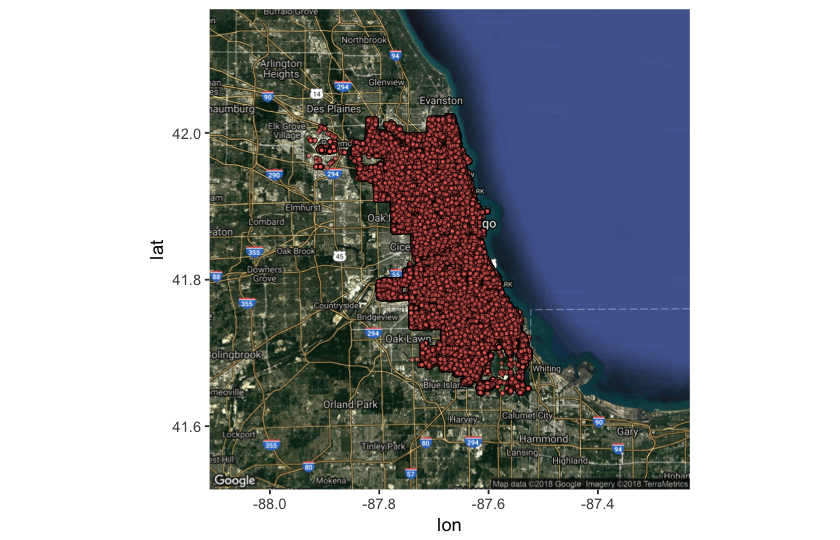

In [144]:
map <- get_map(location = c(lon = mean(na.omit(data$Longitude)),lat = mean(na.omit(data$Latitude))),
               zoom = 10, 
               maptype = "hybrid", 
               scale = 2)

ggmap(map) +
  geom_point(data = data, aes(x = Longitude, y = Latitude, fill = "red", alpha = 0.8), size = 1, shape = 21) +
  guides(fill=FALSE, alpha=FALSE, size=FALSE)

Too many to view here! Let's group by a single

Warning message:
“Removed 170 rows containing missing values (geom_point).”

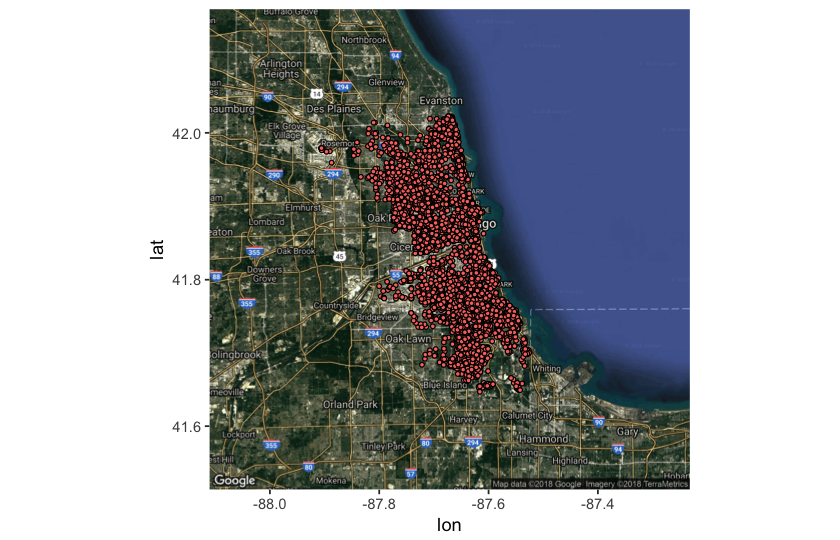

In [154]:
ggmap(map) +
  geom_point(data = data[data$Year == 2017 & data$Primary.Type == "BATTERY",], aes(x = Longitude, y = Latitude, fill = "red"), size = 1, shape = 21) +
  guides(fill=FALSE, alpha=FALSE, size=FALSE)

Warning message:
“Removed 376 rows containing missing values (geom_point).”

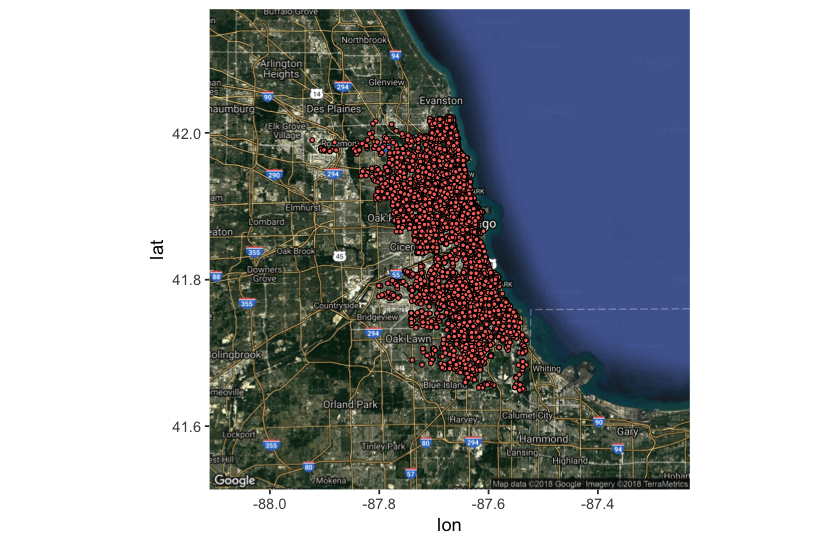

In [155]:
ggmap(map) +
  geom_point(data = data[data$Year == 2017 & data$Primary.Type == "THEFT",], aes(x = Longitude, y = Latitude, fill = "red"), size = 1, shape = 21) +
  guides(fill=FALSE, alpha=FALSE, size=FALSE)

Hmmm....still pretty hard to tell here. I'm gonna try filtering only the top 100 blocks in the dataset and see if they are located in similar regions..

In [187]:
data_block <- data %>% 
    group_by(Block) %>%
    tally %>%
    arrange(desc(n))

top_250_blocks <- as.vector(data_block$Block[1:250])

data_top_250_blocks <- data %>%
  filter(Block %in% top_250_blocks)

In [191]:
map <- get_map(location = c(lon = mean(na.omit(data$Longitude)),lat = mean(na.omit(data$Latitude))),
               zoom = 11, 
               maptype = "hybrid", 
               scale = 2)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=41.84189,-87.671872&zoom=11&size=640x640&scale=1&maptype=hybrid&language=en-EN&sensor=false


Warning message:
“Removed 3313 rows containing missing values (geom_point).”

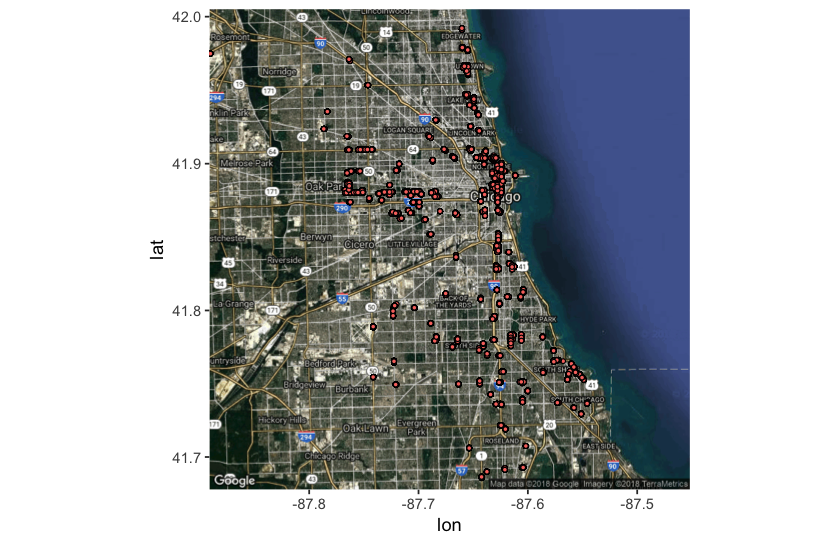

In [193]:
ggmap(map) +
  geom_point(data = data_top_250_blocks, aes(x = Longitude, y = Latitude, fill = "red"), size = 1, shape = 21) +
  guides(fill=FALSE, alpha=FALSE, size=FALSE)

Looks to be some clearer clustering evident there. Let's try the same approach filter of different crime types...

Warning message:
“Removed 3193 rows containing missing values (geom_point).”

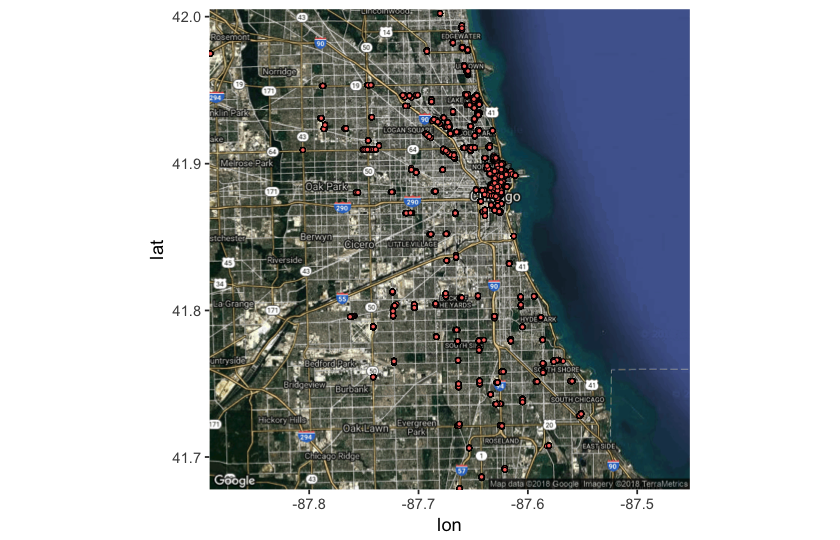

In [197]:
data_block_theft <- data %>%
    filter(Primary.Type == "THEFT") %>%
    group_by(Block) %>%
    tally %>%
    arrange(desc(n))

top_250_blocks_theft <- as.vector(data_block_theft$Block[1:250])

data_top_250_blocks_theft <- data %>%
  filter(Block %in% top_250_blocks_theft)

ggmap(map) +
  geom_point(data = data_top_250_blocks_theft, aes(x = Longitude, y = Latitude, fill = "red"), size = 1, shape = 21) +
  guides(fill=FALSE, alpha=FALSE, size=FALSE)

Warning message:
“Removed 2553 rows containing missing values (geom_point).”

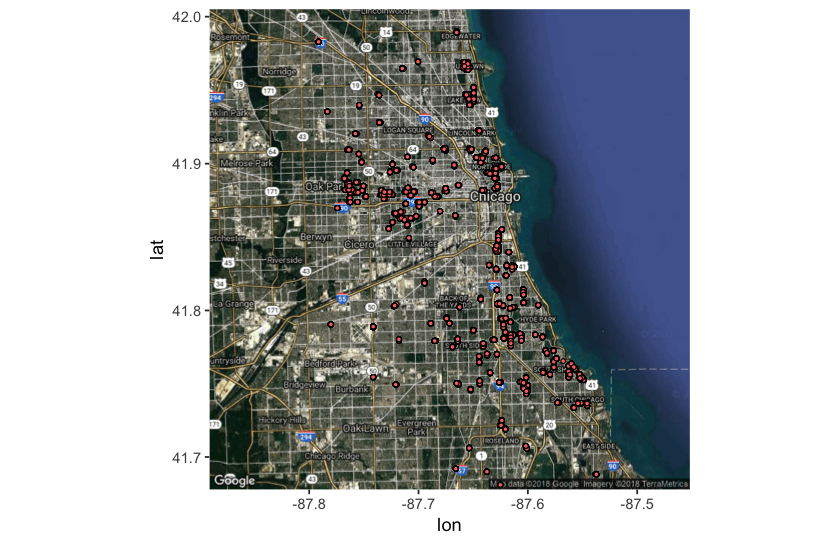

In [198]:
data_block_battery <- data %>%
    filter(Primary.Type == "BATTERY") %>%
    group_by(Block) %>%
    tally %>%
    arrange(desc(n))

top_250_blocks_battery <- as.vector(data_block_battery$Block[1:250])

data_top_250_blocks_battery <- data %>%
  filter(Block %in% top_250_blocks_battery)

ggmap(map) +
  geom_point(data = data_top_250_blocks_battery, aes(x = Longitude, y = Latitude, fill = "red"), size = 1, shape = 21) +
  guides(fill=FALSE, alpha=FALSE, size=FALSE)

So it looks like there's definetly more theft going on Downtown, whereas the battery seems to occur in some specific neighbours hoods spread across town.